# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [2]:
data.head(15) #Выводим первые 15 строк

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

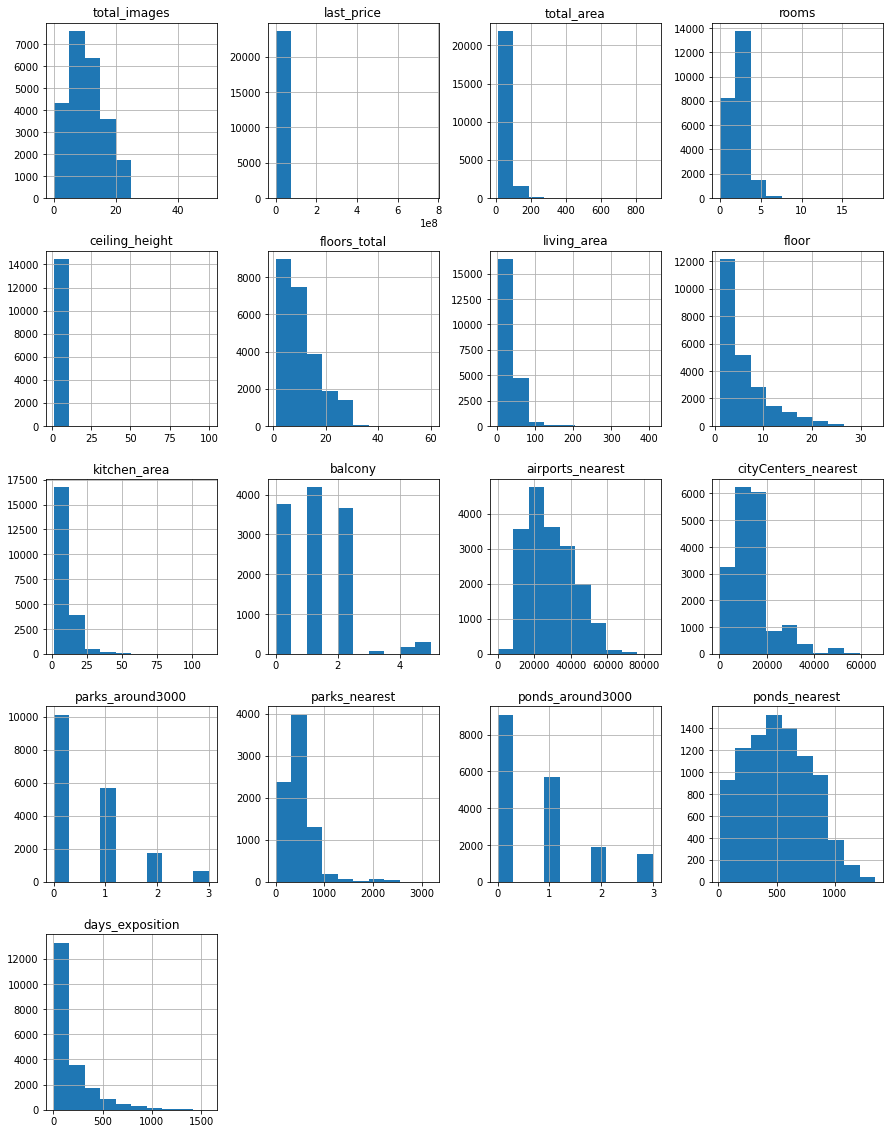

In [4]:
data.hist(figsize=(15, 20));

Есть множество пропусков, нужно привести столбцы к змеиному регистру, по гистограммам пока что сложно сделать выводы, сначала разберемся с данными 

### Предобработка данных
#### Найдите и изучите пропущенные значения в столбцах:

In [5]:
data.isna().sum() #выводим количество пропусков в столбцах

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

* В столбце `ceiling_height` пропуски заполним медианным значением
* В столбце `floors_total` очень мало пропущенных значений, логичную замену им предложить невозможно, поэтому просто отбросим их, чтобы не мешали расчетам.
* В столбцах `living_area` и `kitchen_area` пропуски трогать не будем, они нам не помешают. Значения просто не заполнили
* В столбце `is_apartment` пропуски заполним `False`, т.к. если не указали что жилье является апартаментами, значит оно ими не является
* В столбце `balcony` пропуски заполним `0`, т.к. в квартирах где пропущенно значение нет балкона.
* В столбце `locality_name` пропуски не будем трогать, заменить их нечем, они нам не мешают
* В столбцах `airports_nearest`, `cityCenters_nearest`, `parks_nearest` и  `ponds_nearest` пропуски не будем трогать, значения просто не заполнили
* В столбцах `'parks_around3000'` и `'ponds_around3000'` пропуски заполним `0`, если в стобцах `'ponds_nearest'` и `'parks_nearest'` стоит `0` или `NaN`
* В столбце `days_exposition` пропуски так же не будем трогать, т.к. объявления с пропусками в данном столбце еще акутальны

In [6]:
#Исправим названия столбцов
a = re.compile('((?<=[a-z0-9])[A-Z]|(?!^)[A-Z](?=[a-z]))')
column_name = data.columns
new_col_names = []
for column in column_name:
    new_col_names.append(a.sub(r'_\1', column).lower())
data.columns = new_col_names
#функция не обрабатывает эти значения, поменяем их вручную (не знаю как сделать)
data = data.rename(columns={'parks_around3000' : 'parks_around_3000', 'ponds_around3000' : 'ponds_around_3000'})


In [7]:
#функция для посчета доли пропусков
def isna_part(column):
    nan = data[column].isna().sum() / len(data)
    print(f'В столбце {column}, {nan:.1%} пропущенных значений')

In [8]:
#заполним пропуски в столбце 'ceiling_height' медианным значением 
isna_part('ceiling_height')
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace = True)
print('После обработки пропусков')
isna_part('ceiling_height')
 #проверим замену

В столбце ceiling_height, 38.8% пропущенных значений
После обработки пропусков
В столбце ceiling_height, 0.0% пропущенных значений


In [9]:
#удалим пропущенные значения
isna_part('floors_total')
data = data.dropna(subset=['floors_total'])
print('После обработки пропусков')
isna_part('floors_total')

В столбце floors_total, 0.4% пропущенных значений
После обработки пропусков
В столбце floors_total, 0.0% пропущенных значений


Следуюя логике, если в таблце не указали, что это апартаменты, то скорее всего они не являются апартаментами

Пропуски в столбце `'is_apartment'` заменим на `False`. 

In [10]:
isna_part('is_apartment')
data['is_apartment'].fillna(False, inplace = True)
print('После обработки пропусков')
isna_part('is_apartment')

В столбце is_apartment, 88.2% пропущенных значений
После обработки пропусков
В столбце is_apartment, 0.0% пропущенных значений


Избавимся от пропусков в стобце `'balcony'` заполнив пропуски `0`, т.к если не указали что есть балкон, значит его нет

In [11]:
isna_part('balcony')
data['balcony'].fillna(0, inplace = True)
print('После обработки пропусков')
isna_part('balcony')

В столбце balcony, 48.6% пропущенных значений
После обработки пропусков
В столбце balcony, 0.0% пропущенных значений


В столбце `'kitchen_area'` и `living_area` логичную замену пропусков предложить невозможно. Наверное данные просто не заполнили. Оставим их пустыми, они нам не мешают.

`ponds_nearest` и `ponds_nearest` оставим пустыми, т.к. если мы заполним эти значенния `0`, то получится, что недвижимость находится либо в парке, либо на дне пруда. По этой же причине значения столбцов `airports_nearest` и `city_centers_nearest` не будем трогать.

А значения `'parks_around_3000'` и `'ponds_around3000'` заполним `0`, если в стобцах `'ponds_nearest'` и `'parks_nearest'` стоит `0` или `NaN`

In [12]:
isna_part('parks_around_3000')
isna_part('ponds_around_3000')
data.loc[(data['parks_nearest'] == 0) | (data['parks_nearest']).isna(), 'parks_around_3000'] = 0
data.loc[(data['ponds_nearest'] == 0) | (data['ponds_nearest']).isna(), 'ponds_around_3000'] = 0
print('После обработки пропусков')
isna_part('parks_around_3000')
isna_part('ponds_around_3000')

В столбце parks_around_3000, 23.3% пропущенных значений
В столбце ponds_around_3000, 23.3% пропущенных значений
После обработки пропусков
В столбце parks_around_3000, 0.0% пропущенных значений
В столбце ponds_around_3000, 0.0% пропущенных значений


#### Рассмотрите типы данных в каждом столбце:

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21743 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          23613 non-null  bool   
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          21382 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

* В столбце `first_day_exposition` нужно изменить тип данных на datatime, т.к там хранится дата
* В столбце `floors_total` нужно заменить на целые числа, т.к данные не хранят ничего после запятой
* В столбце `balcony` нужно заменить на целые числа, т.к данные не хранят ничего после запятой
* В столбце `parks_around_3000` нужно заменить на целые числа, т.к данные не хранят ничего после запятой
* В столбце `ponds_around_3000` нужно заменить на целые числа, т.к данные не хранят ничего после запятой

In [14]:
#Переведем столбец 'first_day_exposition' в тип datatime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#Переведем столбец 'floors_total' в тип int
data['floors_total'] = data['floors_total'].astype(int)
#Переведем столбец 'balcony' в тип int
data['balcony'] = data['balcony'].astype(int)
#Переведем столбец 'parks_around_3000' в тип int
data['parks_around_3000'] = data['parks_around_3000'].astype(int)
#Переведем столбец 'ponds_around_3000' в тип int
data['ponds_around_3000'] = data['ponds_around_3000'].astype(int)

#### Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты. 

В `'locality_name'` могут быть неявные дубликаты, проверим и избавимся от них

In [15]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [16]:
#Заменим буквы ё на е в столбце 'locality_name'
data['locality_name'] = data['locality_name'].replace('ё', 'е', regex=True)
data['locality_name'] = data['locality_name'].str.title() # Делаем заглавными первые буквы слов

In [17]:
data['locality_name'] = data['locality_name'].astype(str) #Выдавало ошибку при использование собственной функции, 
#перевел в строку
def replacer(row):
    if 'Поселок Городского Типа ' in row:
        return row.replace('Поселок Городского Типа ', '')
    elif 'Деревня' in row:
        return row.replace('Деревня ', '')
    elif 'Городской Поселок ' in row:
        return row.replace('Городской Поселок ', '')
    elif 'Садовое Товарищество ' in row:
        return row.replace('Садовое Товарищество ', '')
    elif 'Поселок Станции ' in row:
        return row.replace('Поселок Станции ', '')
    elif 'Коттеджный Поселок ' in row:
        return row.replace('Коттеджный Поселок ', '')
    elif 'Поселок ' in row:
        return row.replace('Поселок ', '')
    elif 'Садоводческое Некоммерческое Товарищество ' in row:
        return row.replace('Садоводческое Некоммерческое Товарищество ', '')
    elif 'Село ' in row:
        return row.replace('Село ', '')
    elif 'При Железнодорожной Станции ' in row:
        return row.replace('При Железнодорожной Станции ', '')
    elif 'Село ' in row:
        return row.replace('Село ', '')
    else:
        return row
        

data['locality_name'] = data['locality_name'].apply(replacer)
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

#### Найдите и устраните редкие и выбивающиеся значения

In [18]:
data['ceiling_height'].unique() #посмотрим уникальные значения

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

In [19]:
data['ceiling_height'].describe()

count    23613.000000
mean         2.724581
std          0.990085
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Пропуски связаны с тем, что скорее всего данные не были заполнены, либо ошибка при выгрузке

Встречаются значения `25, 24` и т.д, скорее всего это ошибка при вводе данных. 

Должно быть `2.5, 2.4` и т.д

Сначала исправим ошибки в данных, потом заполним пропуски медианным значением

In [20]:
#создаем функцию для нормализации высоты потолка

def normalize_ceiling_height(row):
    if row < 2:
        return row + 1
    elif row >= 15:
        return row / 10
    else:
        return row
#применим функцию к столбцу
data['ceiling_height'] = data['ceiling_height'].apply(normalize_ceiling_height)
data['ceiling_height'].unique()

array([ 2.7 ,  2.65,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
        2.2 ,  8.3 ,

Удалим редкие и выбивающиеся значения


In [21]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23613.000000,2.361300e+04,23613.000000,23613.000000,23613.000000,23613.000000,21743.000000,23613.000000,21382.000000,23613.000000,18081.000000,18104.000000,23613.000000,8045.000000,23613.000000,9061.000000,20441.000000
mean,9.874518,6.540555e+06,60.340678,2.071147,2.698976,10.673824,34.462781,5.877313,10.564128,0.593063,28788.008185,14185.084015,0.468810,490.554630,0.590480,518.209469,180.884839
std,5.681541,1.090172e+07,35.648988,1.078380,0.253199,6.597173,22.037433,4.873539,5.904316,0.960307,12626.209956,8614.132292,0.748489,341.336698,0.884436,277.887489,219.685543
min,0.000000,1.219000e+04,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18575.000000,9233.750000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13093.000000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.799000e+06,69.800000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37242.000000,16287.000000,1.000000,612.000000,1.000000,730.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,14.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


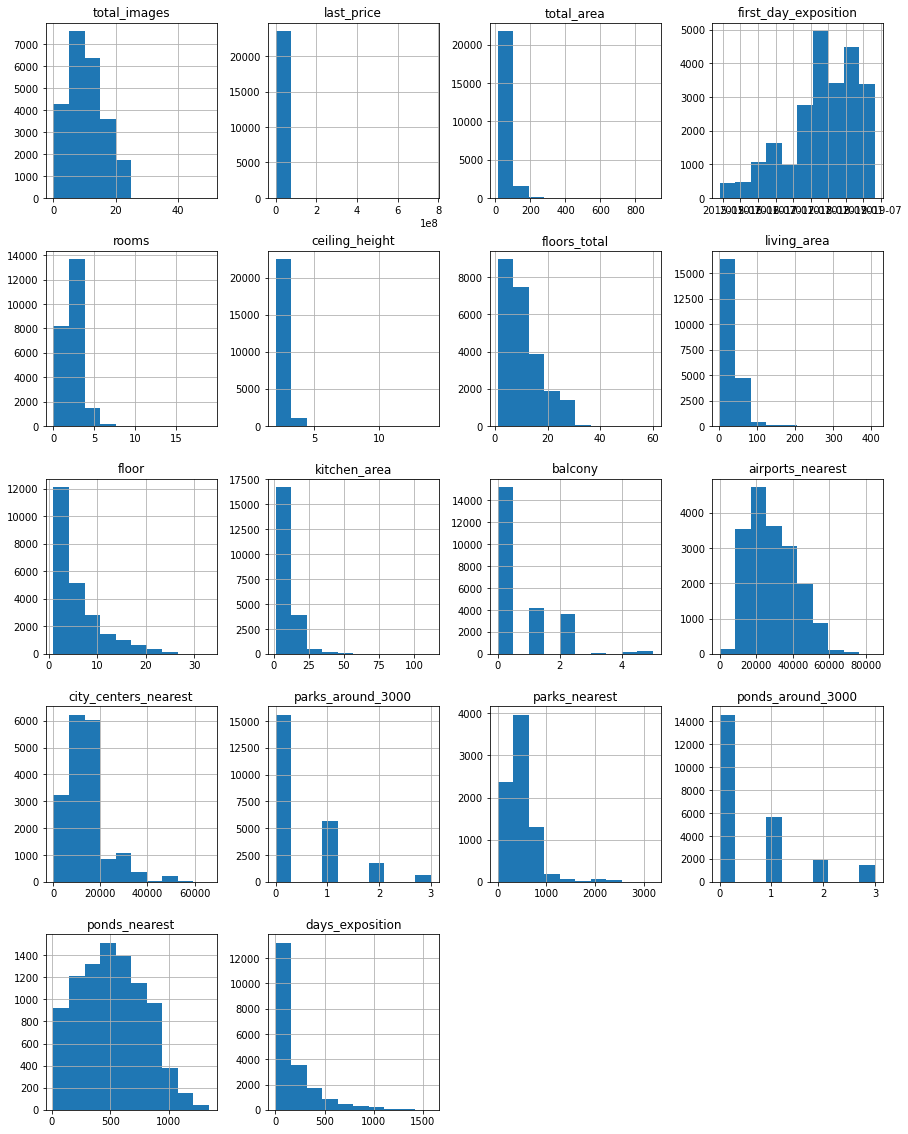

In [22]:
data.hist(figsize=(15, 20));

count    23613.000000
mean         2.698976
std          0.253199
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

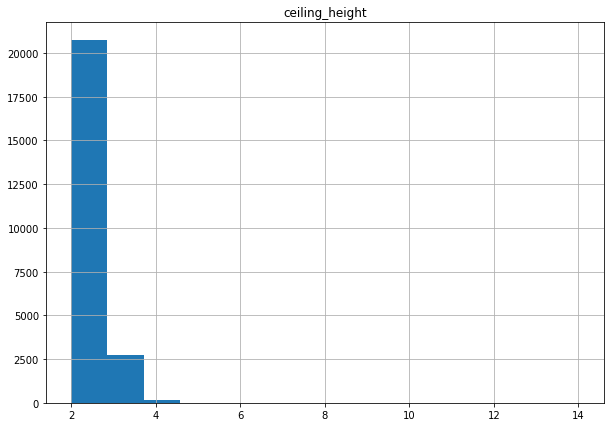

In [23]:
data.hist('ceiling_height', bins=14, figsize=(10, 7))
data['ceiling_height'].describe()

Можно убрать редкие значения больше `5`

In [24]:
data = data.query('ceiling_height < 5')

Посмотрим на `total_area`, где `3 квартиль` 69, а максимальное значение `900`

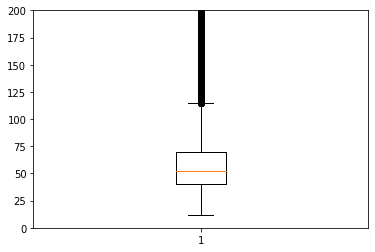

Доля объявлений с площадь больше 116 м2: 5.0%


In [25]:
plt.ylim(0, 200)
plt.boxplot(x=data['total_area'])
plt.show()
ads_part = len(data.query('total_area > 116')) / len(data)
print(f'Доля объявлений с площадь больше 116 м2: {ads_part:.1%}')


<AxesSubplot:>

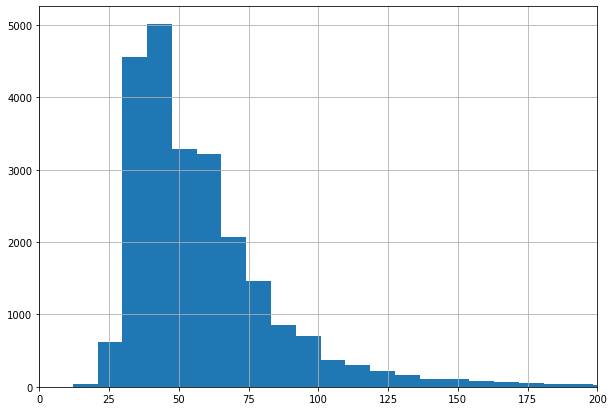

In [26]:
plt.xlim(0, 200)
data['total_area'].hist(bins=100, figsize=(10, 7))

Посмотрим на `5` и `99` процентили

In [27]:
print('5 процентиль:', np.percentile(data['total_area'], 5))
print('99 процентиль:', np.percentile(data['total_area'], 99))

5 процентиль: 31.0
99 процентиль: 197.0


Уберем квартиры после 99 процентали, таким образом избавимся от очень больших квартир. Их всего 1%

In [28]:
total_area_perc_99 = np.percentile(data['total_area'], 99)
data = data.query('total_area < @total_area_perc_99')

Посомтрим стобец `'days_exposition'` и уберем слишком долгие продажи

In [29]:
data['living_area'].describe()

count    21525.000000
mean        33.215086
std         17.261954
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

<AxesSubplot:>

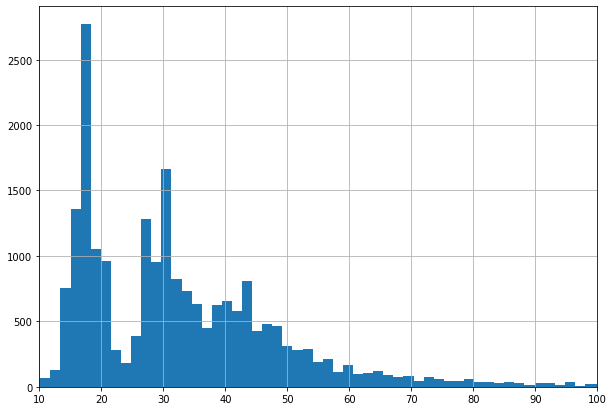

In [30]:
plt.xlim(10, 100)
data['living_area'].hist(bins=100, figsize=(10, 7))

Избавимся от слишком маленьких значений в `living_area`. Уберем значения меньше `15`

In [31]:
data = data.query('living_area > 15')

count    17676.000000
mean       184.871747
std        220.629510
min          1.000000
25%         44.000000
50%        102.000000
75%        239.000000
max       1580.000000
Name: days_exposition, dtype: float64

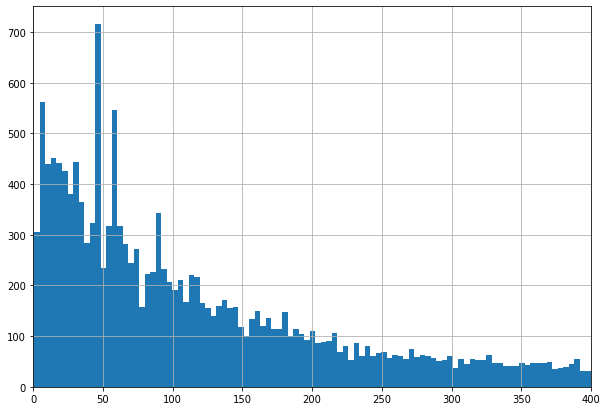

In [32]:
plt.xlim(0,400)
data['days_exposition'].hist(bins=400, figsize=(10,7))
data['days_exposition'].describe()

Заметен скачек на значении 45, скорее всего это автоматическая выгрузка неактуальных объявлений.

На графике видно что квартиры продаеются в большинстве случаев меньше чем за `180` дней

Уберем объявления с продажей дольше чем `2` года

In [34]:
data = data.query('days_exposition < 730')

Встречаются квартиры меньше чем с `1` комнатой. Это аномальные значения, отбросим их

In [35]:
data = data.query('rooms >= 1') #уберем квартиры, где меньше одной комнаты

В столбце `airports_nearest` встречается значение 0 избавимся от него, т.к. получается, что жилье находится в аэропорту

In [36]:
data['airports_nearest'].describe()

count    13253.000000
mean     28809.933675
std      12751.476995
min          0.000000
25%      18363.000000
50%      26871.000000
75%      37351.000000
max      83758.000000
Name: airports_nearest, dtype: float64

In [37]:
data = data.query('airports_nearest != 0')

В данном пункте мы избавились от многих ошибок, дубликатов, аномалий и пропусков в таблице.

Отбросили большие квартиры, нормализовали высоту потолков, исправили названия населенных пунктов

### Посчитайте и добавьте в таблицу новые столбцы

#### Добавьте в таблицу новые столбцы со следующими параметрами:
* цена одного квадратного метра;
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «‎первый», «последний», «другой»);
* расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [38]:
#добавим стобец с ценой одного квадратного метра
data['one_square_meter_price'] = data['last_price'] / data['total_area']
data['one_square_meter_price'] = data['one_square_meter_price'].round(1) #округлим значения

Добавим столбец с категорией дня недели публикации где:
* `0` - Понедельник
* `1` - Вторник
* `2` - Среда
* `3` - Четверг
* `4` - Пятница
* `5` - Суббота
* `6` - Воскресенье

Так же добавим столбцы с `месяцеи` и `годом` публикации

In [39]:
data['weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday #столбец с индексом дня недели
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month #столбец с номером месяца
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year #столбец с годом

Добавим столбец с категорией этажа квартиры:
* `первый` 
* `последний`
* `другой`

In [40]:
# Категоризируем данные в функции
def categorize_floor(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        pass
    
data['floors_category'] = data.apply(categorize_floor, axis = 1) #применим функцию к датафрейму

In [41]:
data['distance_to_center_km'] = data['city_centers_nearest'] / 1000
data['distance_to_center_km'] = data['distance_to_center_km'].round(0)

### Проведите исследовательский анализ данных

#### Изучите следующие параметры объектов:
* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* этаж квартиры;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего аэропорта;
* расстояние до ближайшего парка;
* день и месяц публикации объявления.
* Постройте отдельные гистограммы для каждого из этих параметров. Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.

count    16881.000000
mean        57.688559
std         24.753652
min         17.780000
25%         41.000000
50%         52.000000
75%         68.000000
max        196.000000
Name: total_area, dtype: float64

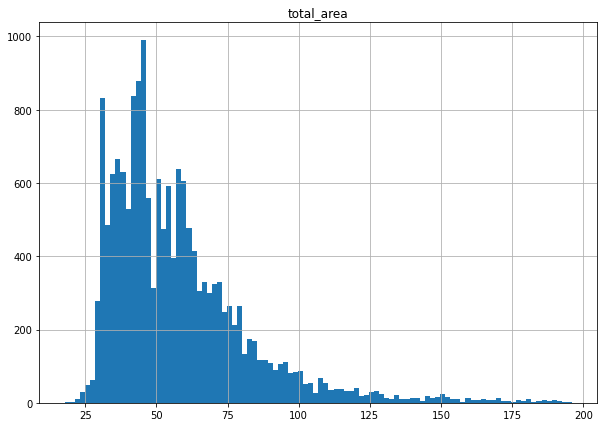

In [42]:
data.hist('total_area', bins=100, figsize=(10, 7))
data['total_area'].describe()

In [43]:
data.loc[data['total_area'] < 50, 'rooms'].median() #найдем медианное количесвто комнат

1.0

Наиболее распространенным значением является `~49 м2` - это `однокомнатные` квартиры

count    16881.000000
mean        33.225849
std         16.299823
min         15.010000
25%         19.000000
50%         30.000000
75%         41.900000
max        159.600000
Name: living_area, dtype: float64

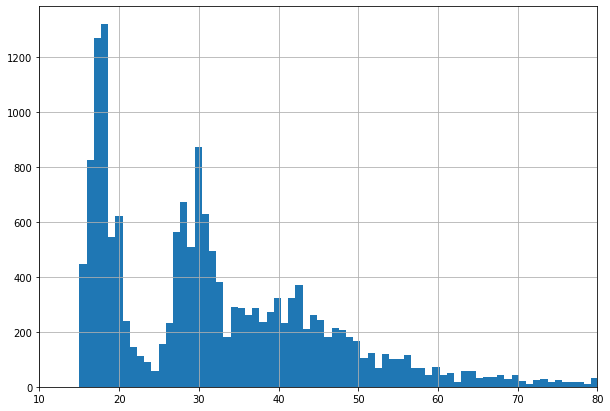

In [44]:
plt.xlim(10, 80)
data['living_area'].hist(bins=160, figsize=(10, 7))
data['living_area'].describe()

In [45]:
print('Доля однокомнатных квартир:', data.loc[data['rooms'] == 1, 'rooms'].count() / len(data) * 100)

Доля однокомнатных квартир: 33.33925715301226


Есть пик в значении `~19 м2`, связан он с большим количеством однокомнатных квартир доля которых составляет `33.34%`

count    16414.000000
mean        10.110362
std          4.986290
min          2.000000
25%          7.000000
50%          9.000000
75%         11.500000
max         93.200000
Name: kitchen_area, dtype: float64

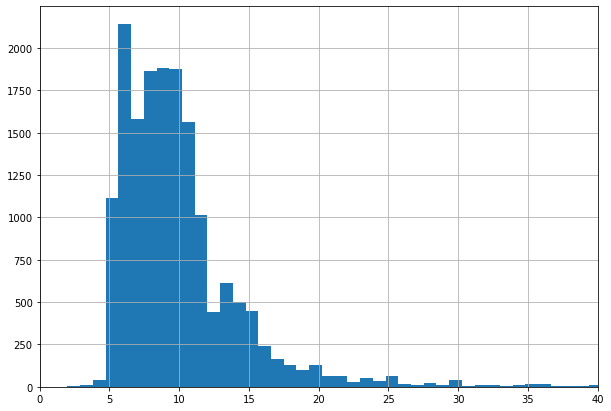

In [46]:
plt.xlim(0, 40)
data['kitchen_area'].hist(bins=100, figsize=(10, 7))
data['kitchen_area'].describe()

Чаще всего встречаются кухни размером от `5 м2` до `10 м2`, это опять же связано с большим количесвтом однокомнатных квартир в объявлениях

count    1.688100e+04
mean     5.805657e+06
std      5.586842e+06
min      1.219000e+04
25%      3.500000e+06
50%      4.600000e+06
75%      6.500000e+06
max      3.300000e+08
Name: last_price, dtype: float64

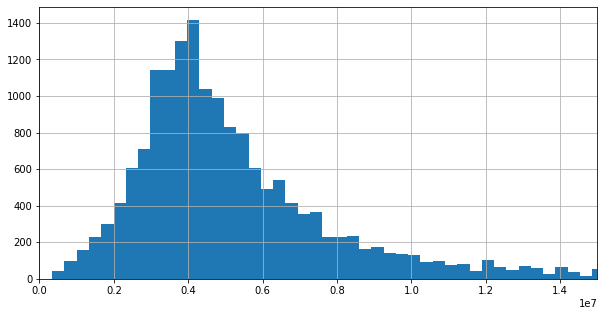

In [47]:
plt.xlim(0, 15000000)
data['last_price'].hist(bins=1000, figsize=(10, 5))
data['last_price'].describe()

Большинство квартир продают за `~4.6` млн рублей

count    16881.000000
mean         2.047035
std          0.948204
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

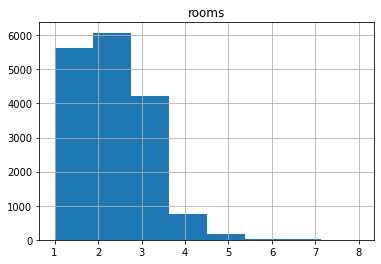

In [48]:
data.hist('rooms', bins=8)
data['rooms'].describe()

Большая часть квартир имеет до `3` комнат

count    16881.000000
mean         2.686081
std          0.198997
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.800000
Name: ceiling_height, dtype: float64

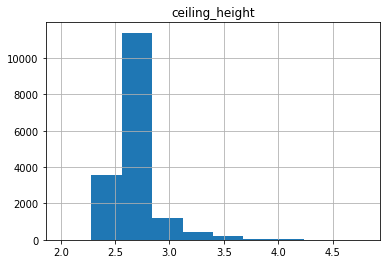

In [49]:
data.hist('ceiling_height')
data['ceiling_height'].describe()

Данные отражают действительность.

Согласно `СП 54.13330.2016 «СНиП 31-01-2003 Здания жилые многоквартирные»`. В своде правил установлено, что в многоквартирных домах в центральной части России потолок должен быть не ниже 2,5 м, а в Сибири, на Дальнем Востоке и на севере Центральной России — не ниже 2,7 м.

count    16881.000000
mean         5.870565
std          4.807122
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

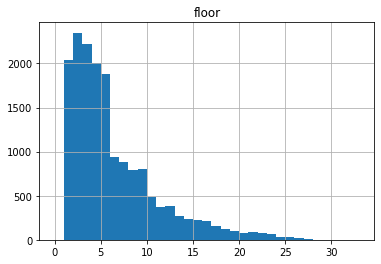

In [50]:
data.hist('floor', bins=33, range=(0,33))
data['floor'].describe()

In [51]:
five_floors_count = data.loc[data['floors_total'] <= 5, 'floors_total'].count()
five_floors_part = five_floors_count / len(data)
print(f'В таблице {five_floors_count} пятиэтажек')
print(f'Что составляет {five_floors_part:.0%} от общего числа объявлений')

В таблице 5687 пятиэтажек
Что составляет 34% от общего числа объявлений


In [52]:
floors_category_pivot = data.pivot_table(index='floors_category', values='floor', aggfunc='count')
floors_category_pivot.columns = ['count']
floors_category_pivot

,count
floors_category,
другой,12487
первый,2039
последний,2355


<AxesSubplot:xlabel='floors_category'>

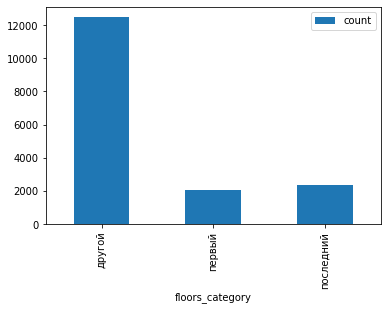

In [53]:
floors_category_pivot.plot(kind='bar')

Здесь логинее использовать столбчатую диаграмму

Меньше всего квартир на `первом` и `последнем` этаже

count    16881.000000
mean        10.634737
std          6.481498
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         60.000000
Name: floors_total, dtype: float64

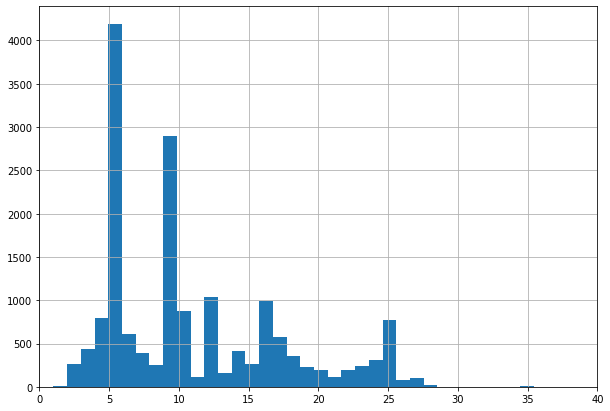

In [54]:
plt.xlim(0, 40)
data['floors_total'].hist(bins=60, figsize=(10, 7))
data['floors_total'].describe()

Больше всего `пятиэтажек` и `девятиэтажек`

count    13269.000000
mean     14432.954782
std       8614.978480
min        208.000000
25%       9767.000000
50%      13220.000000
75%      16275.000000
max      64857.000000
Name: city_centers_nearest, dtype: float64

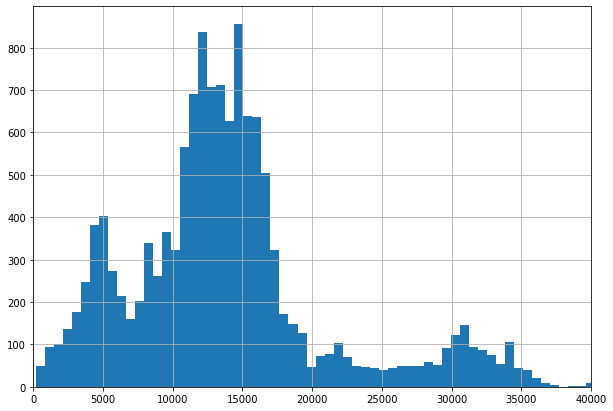

In [55]:
plt.xlim(0, 40000)
data['city_centers_nearest'].hist(bins=100, figsize=(10, 7))
data['city_centers_nearest'].describe()

Большая часть продаваемых квартир растянулась от `11000 м` до `18000 м` до центра

count    13252.000000
mean     28812.107682
std      12749.501712
min       6450.000000
25%      18363.000000
50%      26873.000000
75%      37354.250000
max      83758.000000
Name: airports_nearest, dtype: float64

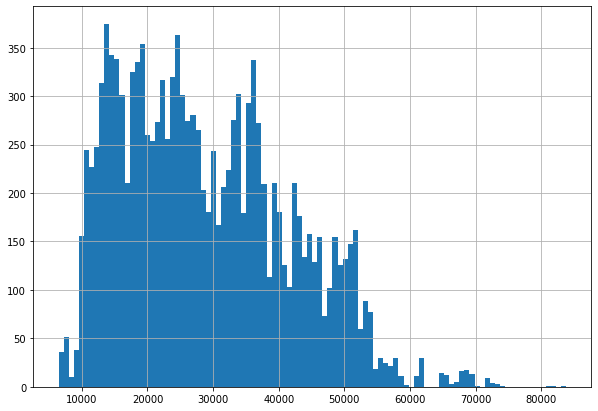

In [56]:
data['airports_nearest'].hist(bins=100, figsize=(10, 7))
data['airports_nearest'].describe()

Большая часть квартир расположена до `30 км` от аэропорта

count    5798.000000
mean      485.729389
std       333.669879
min         1.000000
25%       287.000000
50%       451.000000
75%       611.000000
max      3190.000000
Name: parks_nearest, dtype: float64

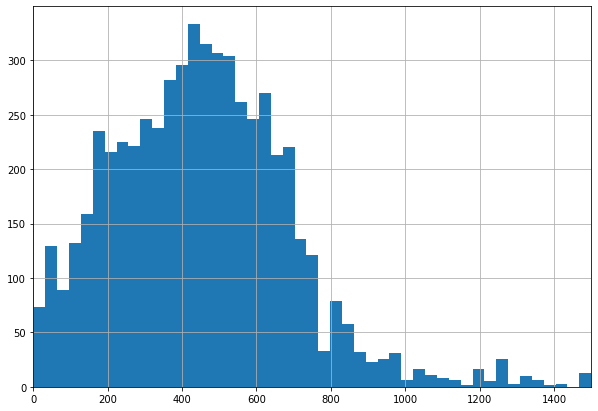

In [57]:
plt.xlim(0, 1500)
data['parks_nearest'].hist(bins=100, figsize=(10, 7))
data['parks_nearest'].describe()

Множество домов имеют парк в радиусе `~500 м`

count    16881.000000
mean         2.568924
std          1.774124
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

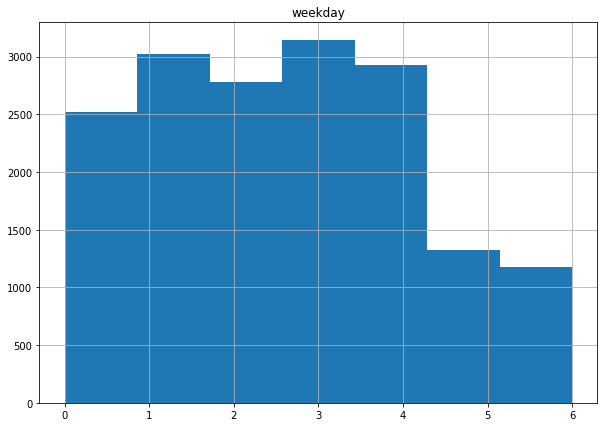

In [58]:
data.hist('weekday', bins=7, figsize=(10, 7))
data['weekday'].describe()

Объявления публикуют чаще всего в буднии дни, в выходные в 2 раза реже. Возможно это связано с выходными у риелторов.

count    16881.000000
mean         6.607073
std          3.450829
min          1.000000
25%          3.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

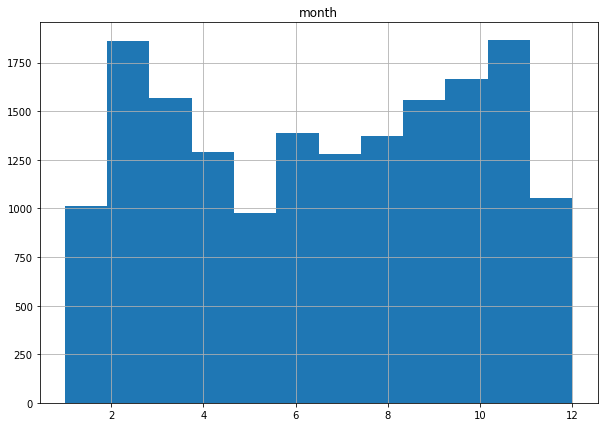

In [59]:
data.hist('month', bins=12, figsize=(10, 7))
data['month'].describe()

Летом и в Новогдние праздники заметен спад публикаций объявлений.

#### Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.

count    16881.000000
mean       155.369409
std        158.281729
min          1.000000
25%         43.000000
50%         96.000000
75%        215.000000
max        729.000000
Name: days_exposition, dtype: float64

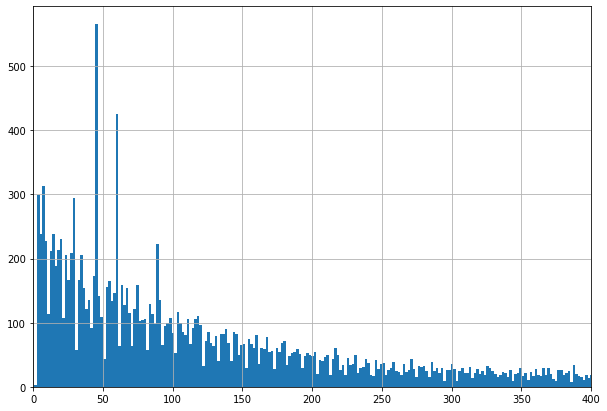

In [60]:
plt.xlim(0,400)
data['days_exposition'].hist(
    bins=400,
    figsize=(10,7)
)
data['days_exposition'].describe()

Гистограмма показывает распределение Пуассона, продажа обычно занимает до `93` дней.

Быстрыми продажами можно считать до `42` дней, а долгими больше `211`. 

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Корреляция составляет 0.6552537346408125


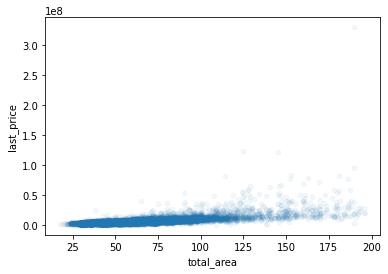

In [61]:
data.plot(
    x='total_area',
    y='last_price',
    kind='scatter',
    alpha=0.05
)
print('Корреляция составляет', data['total_area'].corr(data['last_price']))

Корреляция и график, показывают высокую зависимость `цены` от `общей площади жилья`

Корреляция составляет 0.5412301139782083


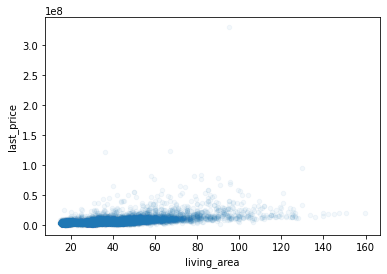

In [62]:
data.plot(
    x='living_area',
    y='last_price',
    kind='scatter',
    alpha=0.05
)
print('Корреляция составляет', data['living_area'].corr(data['last_price']))

Корреляция составляет 0.5318036820656494


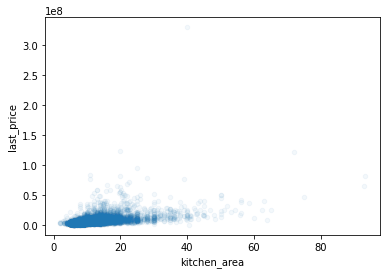

In [63]:
data.plot(
    x='kitchen_area',
    y='last_price',
    kind='scatter',
    alpha=0.05
)
print('Корреляция составляет', data['kitchen_area'].corr(data['last_price']))

На этих графиках зависимость слабее, из этого делаю вывод, что цена больше зависит от `общей` площади, нежели от `жилой` или площади `кухни`

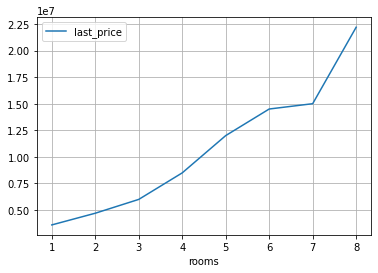

In [64]:
rooms_pt = (
    data
    .pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median')
    .plot(grid=True)
)

С увеличением количества комнат, растет стоимость жилья

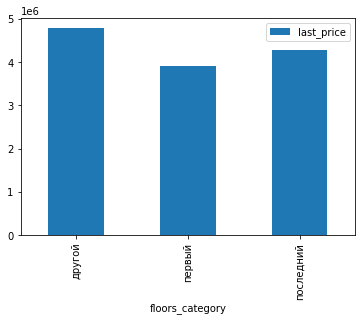

In [65]:
floors_category_pt = (
    data
    .pivot_table(index = 'floors_category', values = 'last_price', aggfunc = 'median')
    .plot(kind='bar')
)

Жилье на `первом` и `последнем` этаже, стоит немного дешевле, чем на `других`

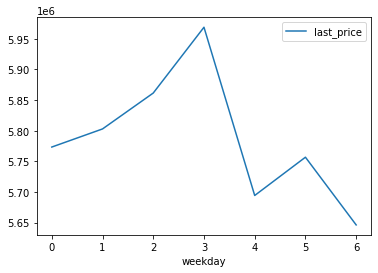

In [66]:
weekday_pt = (
    data
    .pivot_table(index = 'weekday', values = 'last_price', aggfunc = 'mean')
    .plot()
)

Цена в зависимости от дня недели не очень сильно отличается, однако есть падение цены в выходные.

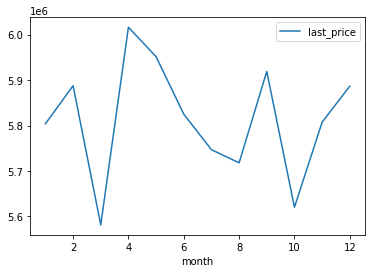

In [67]:
month_pt = (
    data
    .pivot_table(index = 'month', values = 'last_price', aggfunc = 'mean')
    .plot()
)

Зависимость цены от месяца публикации не сильно отличается. В сентябре публикуют квартиры дороже всего, а в октябре цена падает

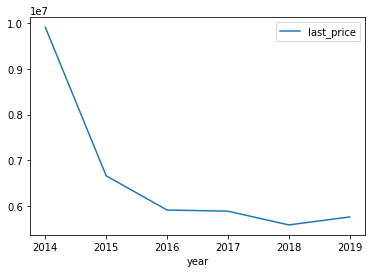

In [68]:
year_pt = (
    data
    .pivot_table(index = 'year', values = 'last_price', aggfunc = 'mean')
    .plot()
)

Цены на жилье после кризиса `2014` года, упали почти на `2 млн`, а с `2018` года показывают рост

График показывает, что с течением времени, цена на недвижемость растет

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name.`

In [69]:
stat = data.pivot_table(index='locality_name', values='one_square_meter_price', aggfunc=['mean', 'count'])
stat.columns = ['mean_price', 'count_ads']
top_10_ads = (
    stat
    .sort_values('count_ads', ascending=False)
    .head(10)
)
top_10_ads

,mean_price,count_ads
locality_name,,
Санкт-Петербург,109715.931081,11409
Мурино,84262.723691,363
Шушары,76290.339628,323
Кудрово,93487.281029,311
Колпино,74186.859574,282
Всеволожск,68819.784502,271
Пушкин,102287.757422,256
Гатчина,68027.597059,238
Парголово,86052.069118,204


<AxesSubplot:xlabel='locality_name'>

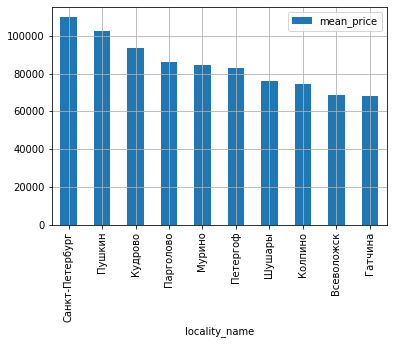

In [70]:
top_10_ads.sort_values('mean_price', ascending=False).plot(y='mean_price', kind='bar', grid=True)

Самый высокий ценник за квадратный метр в `Санкт-Петербурге`

Самая низкая цена за квадратный метр в `Гатчине`, она дешевле чем в `Санкт-Петербурге` почти в `2` раза

#### Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

<AxesSubplot:xlabel='distance_to_center_km'>

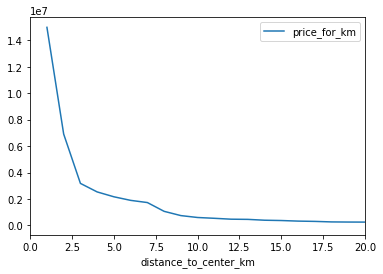

In [71]:
saint_p = data.query('locality_name == "Санкт-Петербург"' and 'city_centers_nearest != 0')
saint_p['price_for_km'] = saint_p['last_price'] / saint_p['distance_to_center_km']
saint_p['price_for_km'] = saint_p['price_for_km'].round()
saint_p_pt = saint_p.pivot_table(index='distance_to_center_km', values='price_for_km')
saint_p_pt.plot(xlim=(0,20))


Грфик показывает, что чем ближе квартира к центру, тем дороже стоимость.

Заметен высокий скачек цены за километр в квартирах расположенных ближе 5 км от центра.

In [72]:
saint_p_pt_2 = saint_p.pivot_table(index='distance_to_center_km', values='one_square_meter_price')

In [73]:
saint_p_pt_2.head(10)

,one_square_meter_price
distance_to_center_km,
0.0,165523.342857
1.0,150425.669531
2.0,148213.291667
3.0,115033.898739
4.0,123691.581505
5.0,131492.358277
6.0,139424.176903
7.0,145830.269416
8.0,120991.554587


<AxesSubplot:xlabel='distance_to_center_km'>

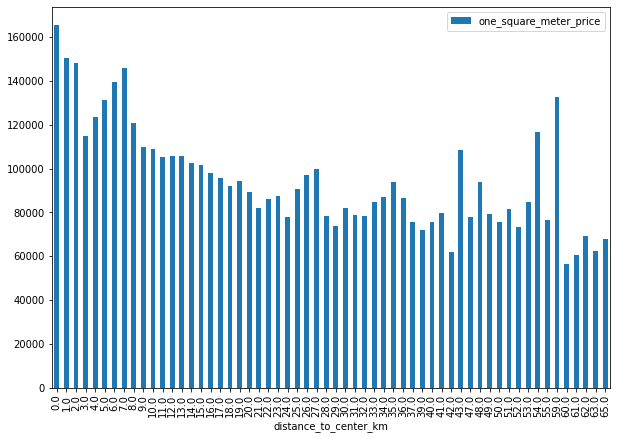

In [74]:
saint_p_pt_2.plot(kind='bar', figsize=(10, 7))

Самый дорогой квадратный метр в квартирах расположенных ближе `2 км` от центра, на `3 км` от центра заметно резкое падение цены, начиная с `4 км` и заканчиывая `7 км` цена за м2 растет.

### Общий вывод

* В первом пункте мы изучили общую информацию
* В втором пункте совершили предобрабутку данных
* В третьем пункте добавили столбцы
* В червертом пункте провели исследовательский анализ данных, который показал что:


Чаще всех продают `однокомнатные` квартиры. А самая растространенная этажность домов - это `пяти` и `девятиэтажки`. 

Объявления публикуют чаще в `буднии`, чем в выходные, так же заметен спад публикаций объявлений в `Новогодние праздники` и `летом`. 

Графики показали, что чем больше `общая площадь квартиры`, тем выше ее стоимость. Также цена зависит от `количества комнат` и `удаленности от центра`. Заметен высокий скачек цены за километр в квартирах расположенных ближе `2 км` от центра. 


Квартиры на `первом` и `последнем` этаже стоят немного дешевле квартир на `других` этажах.

Самый высокий ценник за квадратный метр, как и ожидалось, в `Санкт-Петербурге`.

Самая низкая цена за квадратный метр в `Гатчине`, она дешевле чем в `Санкт-Петербурге` почти в `2` раза.

Продажа обычно занимает `до 93 дней`, быстрыми продажами можно считать квартиры проданые в пириод `до 42 дней`, а долгими больше `211 дней`.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод